In [3]:
import requests
import pandas as pd

In [1]:
url = "https://infra.datos.gob.ar/catalog/sspm/dataset/168/distribution/168.1/download/datos-tipo-cambio-usd-futuro-dolar-frecuencia-diaria.csv"


In [5]:
from io import StringIO
import matplotlib.pyplot as plt
response = requests.get(url)

# print(response.text)
df = pd.read_csv(StringIO(response.text), usecols=['indice_tiempo', 'tipo_cambio_a3500','tipo_cambio_implicito_en_adrs'])

with open('datos.csv', 'w', newline='') as archivo_csv:
       archivo_csv.write(response.text)

df.head()


,indice_tiempo,tipo_cambio_a3500,tipo_cambio_implicito_en_adrs
0,2002-03-05,1.9917,2.180124
1,2002-03-06,2.0508,2.222222
2,2002-03-07,2.1375,2.343949
3,2002-03-08,2.2033,2.227778
4,2002-03-09,2.2033,2.227778


In [16]:
df.dropna()

,indice_tiempo,tipo_cambio_a3500,tipo_cambio_implicito_en_adrs
0,2002-03-05,1.9917,2.180124
1,2002-03-06,2.0508,2.222222
2,2002-03-07,2.1375,2.343949
3,2002-03-08,2.2033,2.227778
4,2002-03-09,2.2033,2.227778
...,...,...,...
8076,2024-04-14,866.7500,971.329279
8077,2024-04-15,868.2500,971.329279
8078,2024-04-16,868.7500,971.329279
8079,2024-04-17,869.2500,971.329279


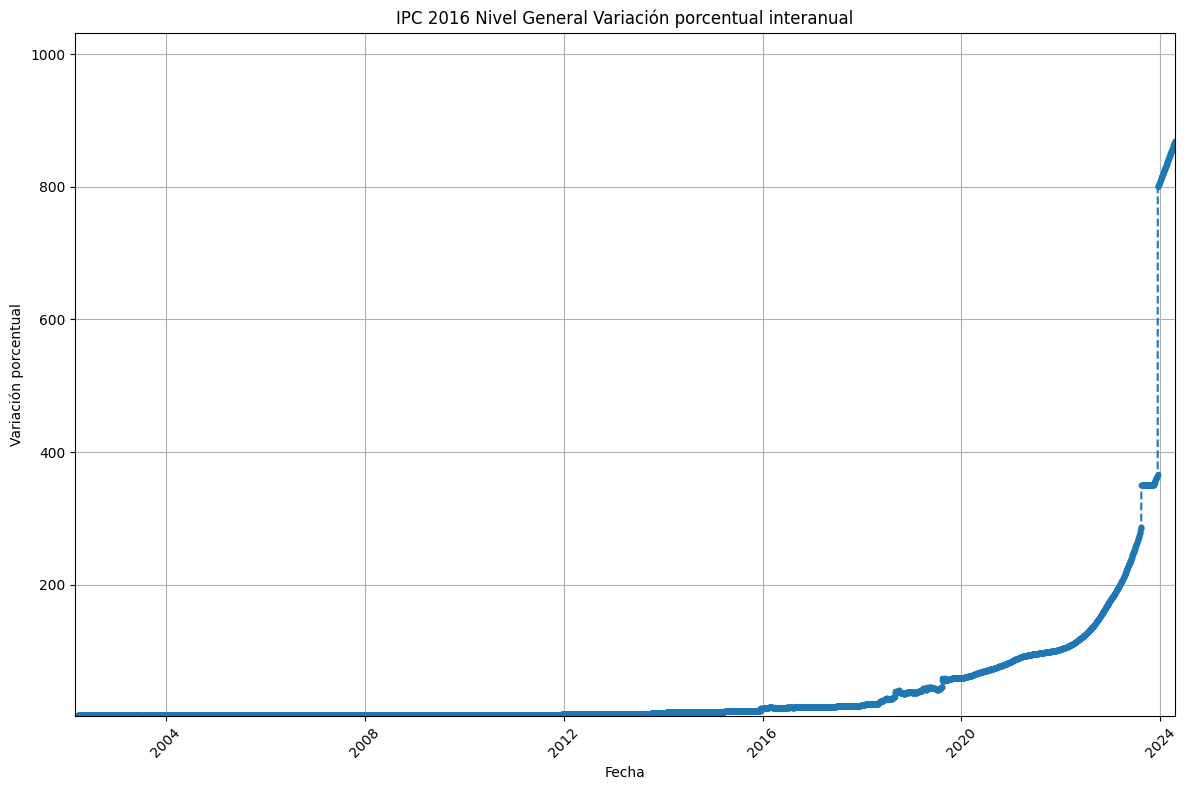

In [15]:
df['indice_tiempo'] = pd.to_datetime(df['indice_tiempo'])
plt.figure(figsize=(12 , 8))
plt.plot(df['indice_tiempo'], df['tipo_cambio_a3500'], marker='.', linestyle='--',markevery=1)
plt.xlim(min(df['indice_tiempo']), max(df['indice_tiempo']))
plt.ylim(min(df['tipo_cambio_implicito_en_adrs']), max(df['tipo_cambio_implicito_en_adrs']))  # Ajusta el rango de los ejes y
plt.title('IPC 2016 Nivel General Variación porcentual interanual')
plt.xlabel('Fecha')
plt.ylabel('Variación porcentual')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()